In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open('Features.pk', 'rb') as handle:
    data = pickle.load(handle)

In [3]:
from sklearn import preprocessing
cols = data.columns
x = data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data = pd.DataFrame(x_scaled)
data.columns = cols

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [6]:
X = data.drop(['IcNaOk'], axis=1)
y = data['IcNaOk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = None)

In [7]:
#SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel()) 

In [8]:
model = SVC(kernel='linear')
model.fit(X_train_res, y_train_res)

print_score(model, X_train_res, y_train_res, X_test, y_test, train=True)

Train Result:
Accuracy Score: 81.42%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.810039     0.818567  0.814245     0.814303      0.814303
recall        0.821028     0.807462  0.814245     0.814245      0.814245
f1-score      0.815496     0.812976  0.814245     0.814236      0.814236
support    3833.000000  3833.000000  0.814245  7666.000000   7666.000000
_______________________________________________
Confusion Matrix: 
 [[3147  686]
 [ 738 3095]]



In [9]:
print_score(model, X_train, y_train, X_test, y_test, train=False)

Test Result:
Accuracy Score: 78.79%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0         1.0  accuracy    macro avg  weighted avg
precision     0.959124    0.287846  0.787928     0.623485      0.889405
recall        0.797330    0.706806  0.787928     0.752068      0.787928
f1-score      0.870775    0.409091  0.787928     0.639933      0.822824
support    1648.000000  191.000000  0.787928  1839.000000   1839.000000
_______________________________________________
Confusion Matrix: 
 [[1314  334]
 [  56  135]]



<AxesSubplot:>

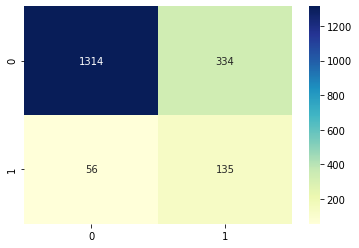

In [10]:
import sklearn.metrics as metrics
y_pred = model.predict(X_test)
cm_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [11]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

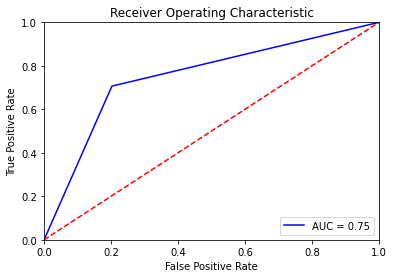

In [12]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

pca = PCA(n_components=3)
scaler = StandardScaler()

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Text(0, 0.5, 'Second Principal Component')

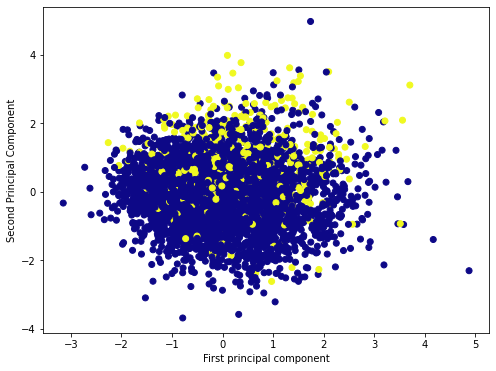

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(X_train[:,1],X_train[:,2],c=y_train,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [18]:
'''
params:
C = Controls trade-off between classifying training points correctly and having a smooth decision boundary. (higher -> harder margin)
gamma = Controls how far the influence of a single training set reaches. (higher -> close points have more weight)
'''
# poly_model = SVC(kernel='poly', degree=2, gamma='auto', coef0=1, C=5)
# poly_model.fit(X_train, y_train)
# print_score(poly_model, X_train, y_train, X_test, y_test, train=True)
# # print_score(model, X_train, y_train, X_test, y_test, train=False)

# radial_model = SVC(kernel='rbf', gamma=0.5, C=0.1)
# radial_model.fit(X_train, y_train)
# print_score(radial_model, X_train, y_train, X_test, y_test, train=True)

'\nparams:\nC = Controls trade-off between classifying training points correctly and having a smooth decision boundary. (higher -> harder margin)\ngamma = Controls how far the influence of a single training set reaches. (higher -> close points have more weight)\n'